# ImageNetで訓練済みのニューラルネットを用いた
# 手持ち画像の分類

以下ではmahotasパッケージを使い画像分類を試みます。この例では、青野が撮影した約2500枚の画像（20種類の植物）からなる画像データを用いて機械学習を行い、画像分類します。

以下のデータをdownloadし、展開しておいてください。(270MBくらいあります）

http://www.tutarc.org/Seminar/Python/download/myPlants2.zip



In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3  
session = tf.Session(config=config)
import keras
from keras import backend as K
K.set_session(session) 

Using TensorFlow backend.


# VGG16を訓練済みDNN (ImageNet)として利用

In [2]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np
fc2_training = np.empty((0,4096),float)
base_model = VGG16(weights='imagenet')
pp_model = Model(inputs=base_model.input, 
              outputs=base_model.get_layer('fc2').output)

In [3]:
import os
print(os.getcwd())
os.chdir('C:/Users/Aono/DeepLearning/data/myPlantPhoto/Training') # Linuxの場合

classes = folders = ['Ajisai', 'Egonoki', 'Hinoki', 'Ichou', 'Itayakaede',
	'Keyaki', 'Konara', 'Kunugi', 'Kusunoki', 'Kuwa',
	'Matsu', 'Mizuki', 'Nankinhaze', 'Pratanus', 'Sakura',
	'Sazanka', 'Sennoki', 'Sugi', 'Tsutsuji', 'Yuri']
listAll = []
listIndex = []
total = 0
filecnt = 0
for folder in folders:
	flist = os.listdir(folder) # using os list directory
	length = len(flist)
	for i in range(length):
		listIndex.append(filecnt)
	total += len(flist)
	listAll.append(flist)
	filecnt += 1

print("total files = ",total)

C:\Users\aono\DeepLearning
total files =  1400


In [5]:
# 時間かかります
flat_list = [item for sublist in listAll for item in sublist]

# do training using pretrained network (takes some time) 
import numpy as np
fc2_training = np.empty((0,4096),float)

for i in range(len(flat_list)):
    if i % 400 == 0:
        print("Processing ...",(i+1)," data...")
    img_path = "all/"+flat_list[i]
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    fc2_ft = pp_model.predict(x)
    fc2_ft = np.array(fc2_ft)
    fc2_training = np.append(fc2_training, fc2_ft,axis=0)


Processing ... 1  data...
Processing ... 401  data...
Processing ... 801  data...
Processing ... 1201  data...


In [7]:
import os
print(os.getcwd())
os.chdir('C:/Users/Aono/DeepLearning/') # Windowsの場合

print (fc2_training.shape)
np.save('npy/fc2_trainingVGG16.npy',fc2_training)

C:\Users\Aono\DeepLearning\data\myPlantPhoto\Training
(1400, 4096)


In [8]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

base_model = VGG16(weights='imagenet')
q_model = Model(inputs=base_model.input,
              outputs=base_model.get_layer('fc2').output)

q_model.summary()

train_truth = listIndex


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [9]:
os.chdir('C:/Users/Aono/DeepLearning/data/myPlantPhoto/Testing')# Linuxの場合
print(os.getcwd())


C:\Users\Aono\DeepLearning\data\myPlantPhoto\Testing


In [10]:
# query用 (未知)データをリストに代入
folders = ['Ajisai', 'Egonoki', 'Hinoki', 'Ichou', 'Itayakaede',
	'Keyaki', 'Konara', 'Kunugi', 'Kusunoki', 'Kuwa',
	'Matsu', 'Mizuki', 'Nankinhaze', 'Pratanus', 'Sakura',
	'Sazanka', 'Sennoki', 'Sugi', 'Tsutsuji', 'Yuri']
q_listAll = []
q_listIndex = []
q_total = 0
q_filecnt = 0
for folder in folders:
	q_flist = os.listdir(folder) # using os list directory
	length = len(q_flist)
	for i in range(length):
		q_listIndex.append(q_filecnt)
	q_total += len(q_flist)
	q_listAll.append(q_flist)
	q_filecnt += 1

In [11]:
# query全体を1画像あたり4096次元となるように、テストデータ数全部の特徴量を保持するリストに代入
q_flat_list = [item for sublist in q_listAll for item in sublist]
fc2_query200 = np.empty((0,4096),float)

for i in range(len(q_flat_list)):
	img_path = "all/"+q_flat_list[i] 
	img = image.load_img(img_path, target_size=(224, 224))
	x = image.img_to_array(img)
	x = np.expand_dims(x, axis=0)
	x = preprocess_input(x)
	fc2_ft = q_model.predict(x)
	fc2_ft = np.array(fc2_ft)
	fc2_query200 = np.append(fc2_query200, fc2_ft,axis=0)

print (fc2_query200.shape)


(200, 4096)


In [12]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation 
import numpy as np
from keras.utils import np_utils 

a_model = Sequential()
a_model.add(Dense(256,input_dim=4096)) # 入力画像あたり4096次元
a_model.add(Activation('relu'))
a_model.add(Dropout(0.5))
a_model.add(Dense(20,activation='softmax')) # 20種類の植物のため、出力は20
a_compile = a_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 


C:\Users\Aono\DeepLearning\data\myPlantPhoto\Testing


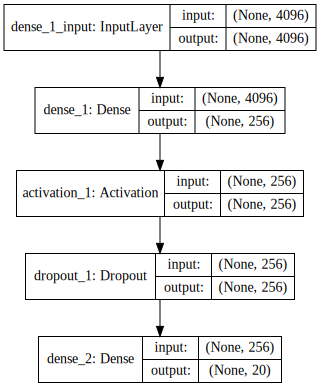

In [14]:
import os
print(os.getcwd())
os.chdir('C:/Users/Aono/DeepLearning/') # Windowsの場合

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from keras.utils.vis_utils import plot_model
plot_model(a_model, show_shapes=True, to_file='images/Python-Pretrained-Plant.jpg')
plot_model(a_model, show_shapes=True, to_file='pdf/Python-Pretrained-Plant.pdf')

SVG(model_to_dot(a_model, show_shapes=True).create(prog='dot', format='svg'))


In [15]:
NB_CLASSES = 20
print(fc2_training.shape)
print(fc2_query200.shape)

my_querylabel = np_utils.to_categorical(q_listIndex, NB_CLASSES)
print(my_querylabel.shape)

(1400, 4096)
(200, 4096)
(200, 20)


In [16]:
# validationを含む
my_label = np_utils.to_categorical(train_truth, NB_CLASSES)
a_fit = a_model.fit(fc2_training, my_label, 
                    epochs=150, batch_size=128, 
                    validation_data=(fc2_query200, my_querylabel)) 


Train on 1400 samples, validate on 200 samples
Epoch 1/150
1400/1400 [==============================] - 0s 343us/step - loss: 3.8555 - acc: 0.2307 - val_loss: 1.7704 - val_acc: 0.4450
Epoch 2/150
1400/1400 [==============================] - 0s 221us/step - loss: 1.7973 - acc: 0.4479 - val_loss: 1.4593 - val_acc: 0.5100
Epoch 3/150
1400/1400 [==============================] - 0s 219us/step - loss: 1.5183 - acc: 0.5293 - val_loss: 1.3206 - val_acc: 0.6050
Epoch 4/150
1400/1400 [==============================] - 0s 218us/step - loss: 1.3365 - acc: 0.5893 - val_loss: 1.1613 - val_acc: 0.6500
Epoch 5/150
1400/1400 [==============================] - 0s 217us/step - loss: 1.1648 - acc: 0.6236 - val_loss: 1.0063 - val_acc: 0.6800
Epoch 6/150
1400/1400 [==============================] - 0s 212us/step - loss: 1.0700 - acc: 0.6714 - val_loss: 0.9428 - val_acc: 0.7600
Epoch 7/150
1400/1400 [==============================] - 0s 219us/step - loss: 0.9148 - acc: 0.7071 - val_loss: 0.9796 - val_acc: 0

1400/1400 [==============================] - 0s 206us/step - loss: 0.0476 - acc: 0.9843 - val_loss: 0.6869 - val_acc: 0.8300
Epoch 61/150
1400/1400 [==============================] - 0s 204us/step - loss: 0.0512 - acc: 0.9857 - val_loss: 0.8209 - val_acc: 0.8250
Epoch 62/150
1400/1400 [==============================] - 0s 209us/step - loss: 0.0869 - acc: 0.9736 - val_loss: 0.7311 - val_acc: 0.8300
Epoch 63/150
1400/1400 [==============================] - 0s 212us/step - loss: 0.0554 - acc: 0.9829 - val_loss: 0.7110 - val_acc: 0.8500
Epoch 64/150
1400/1400 [==============================] - 0s 202us/step - loss: 0.0644 - acc: 0.9757 - val_loss: 0.8065 - val_acc: 0.8350
Epoch 65/150
1400/1400 [==============================] - 0s 203us/step - loss: 0.0556 - acc: 0.9779 - val_loss: 0.8610 - val_acc: 0.8100
Epoch 66/150
1400/1400 [==============================] - 0s 203us/step - loss: 0.0949 - acc: 0.9657 - val_loss: 0.7297 - val_acc: 0.8600
Epoch 67/150
1400/1400 [=======================

1400/1400 [==============================] - 0s 207us/step - loss: 0.0335 - acc: 0.9907 - val_loss: 1.0839 - val_acc: 0.8300
Epoch 120/150
1400/1400 [==============================] - 0s 208us/step - loss: 0.0354 - acc: 0.9914 - val_loss: 1.0281 - val_acc: 0.8250
Epoch 121/150
1400/1400 [==============================] - 0s 204us/step - loss: 0.0250 - acc: 0.9914 - val_loss: 0.9984 - val_acc: 0.8350
Epoch 122/150
1400/1400 [==============================] - 0s 219us/step - loss: 0.0420 - acc: 0.9843 - val_loss: 0.8828 - val_acc: 0.8450
Epoch 123/150
1400/1400 [==============================] - 0s 220us/step - loss: 0.0331 - acc: 0.9879 - val_loss: 1.0457 - val_acc: 0.8300
Epoch 124/150
1400/1400 [==============================] - 0s 203us/step - loss: 0.0352 - acc: 0.9843 - val_loss: 1.0759 - val_acc: 0.8150
Epoch 125/150
1400/1400 [==============================] - 0s 209us/step - loss: 0.0205 - acc: 0.9929 - val_loss: 0.9700 - val_acc: 0.8500
Epoch 126/150
1400/1400 [================

In [17]:
# Matplotlibのフォントの制御（大きさや種類）
%matplotlib inline
import numpy as np # Numpy
import matplotlib
import matplotlib.pyplot as plt # 描画ライブラリ
print (matplotlib.rcParams.get('font.family'))
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

font_prop = fm.FontProperties()  
font_prop.set_style('normal')
font_prop.set_weight('light')
font_prop.set_size('12')

fp2 = font_prop.copy()# フォントプロパティ(FP)をコピー
fp2.set_size('20')# フォントプロパティ(FP)をコピー
fp2.set_family('serif')# フォントはSerif(明朝体など）に設定

['sans-serif']


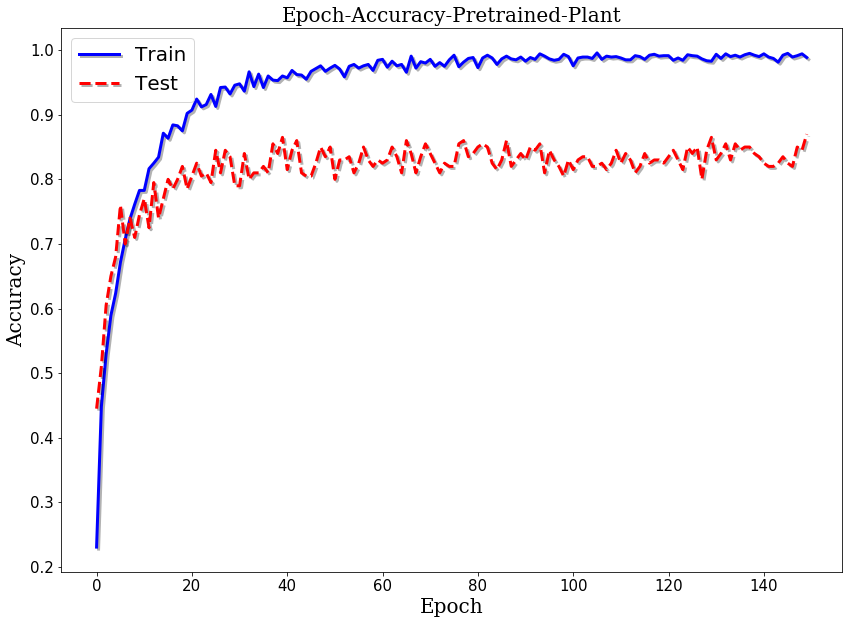

In [18]:
% matplotlib inline
import matplotlib.pyplot as plt

# 精度グラフの描画　% matplotlib inline
plt.figure(figsize=(14,10))

plt.plot(a_fit.history['acc'], 
         color='b', 
         linestyle='-', 
         linewidth=3, 
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.plot(a_fit.history['val_acc'], 
         color='r', 
         linestyle='--',
         linewidth=3,
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

plt.tick_params(labelsize=15)
plt.title('Epoch-Accuracy-Pretrained-Plant',fontsize=25,font_properties=fp2)
plt.ylabel('Accuracy',fontsize=20,font_properties=fp2)
plt.xlabel('Epoch',fontsize=20,font_properties=fp2)
plt.legend(['Train', 'Test'], loc='best', fontsize=20)

plt.savefig('pdf/Epoch-Accuracy-Pretrained-Plant.pdf')
plt.show()


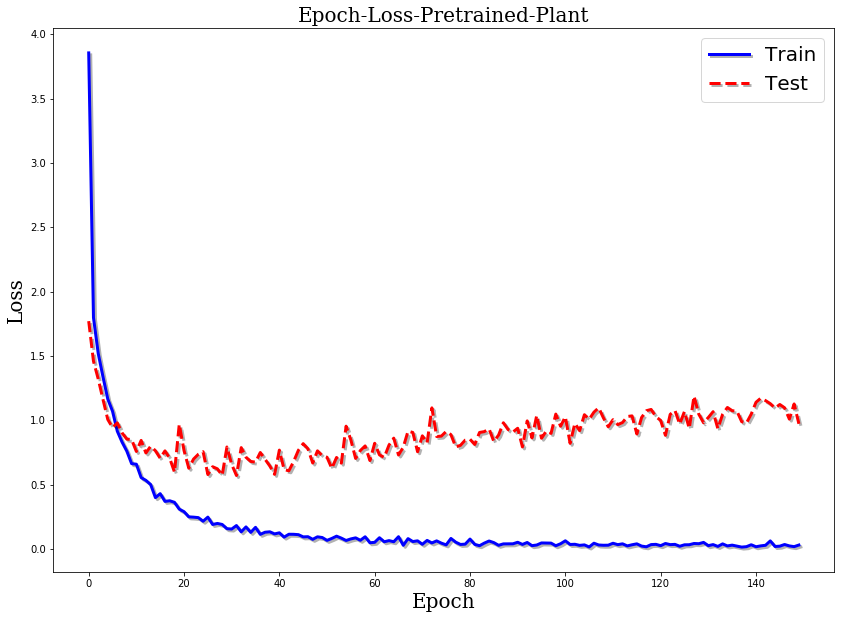

In [19]:
# 損失グラフの描画　% matplotlib inline
plt.figure(figsize=(14,10))

plt.plot(a_fit.history['loss'], 
         color='b', 
         linestyle='-', 
         linewidth=3, 
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.plot(a_fit.history['val_loss'], 
         color='r', 
         linestyle='--',
         linewidth=3,
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

plt.title('Epoch-Loss-Pretrained-Plant',fontsize=25,font_properties=fp2)
plt.ylabel('Loss',fontsize=20,font_properties=fp2)
plt.xlabel('Epoch',fontsize=20,font_properties=fp2)
plt.legend(['Train', 'Test'], loc='best', fontsize=20)
plt.savefig('pdf/Epoch-Loss-Pretrained-Plant.pdf')
plt.show()

In [20]:
# 混合行列の描画関数の定義
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pylab
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(12,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=25)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=15)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=15)
    plt.yticks(tick_marks, classes,fontsize=15)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center", fontsize=15,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=20)
    plt.xlabel('Predicted label',fontsize=20)

In [21]:
a_pred = a_model.predict_classes(fc2_query200, batch_size=128, verbose=1)
print(a_pred)


200/200 [==============================] - 0s 294us/step
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2 17
  2  2  2 17  2  2  3  3  3  3  3  3  3  3  3  3  7  4  4  4  4  4  4  4
  4  4  7  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  9  6  6  7  7
 12  7  7  7  7  7  6  7  8 13  8  4  8  8  8  8 10  8  9  9  9  9  1  9
  9  9  9  9 10 10 17 10 10 10 10 10 10 10 11 11  4 11 11 11 11 11  8 11
 12  4 12 10  5 13 12 12 14 12 13 13 13 13 16 13 13 13 13  1 14 14 14 14
 14 14 14 14 14 14 15 15 15 18 15 15 18 15 15 15 13 16 16 16 16 10 16 16
 16 17 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19]


Confusion matrix, without normalization
[[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  1  0  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  0  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  7  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  9  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  9  0  1  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  1  8  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0 10  0  0  0  0  0]
 [ 0  0  0  0  

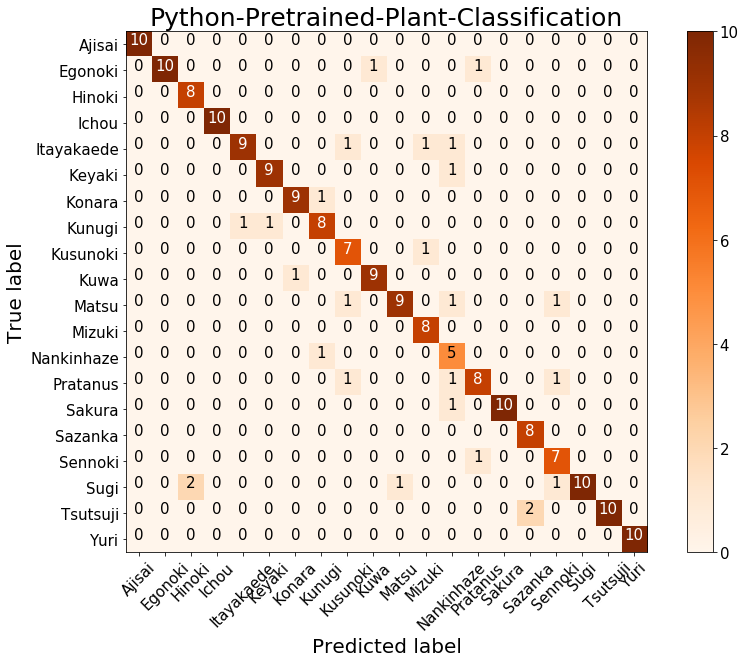

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
# a_pred = a_model.predict_classes(fc2_query200, batch_size=128, verbose=1)
test_truth = q_listIndex
a_actual = test_truth
a_cm = confusion_matrix(a_pred, a_actual) 
plot_confusion_matrix(a_cm, classes=classes, title='Python-Pretrained-Plant-Classification')
plt.savefig('pdf/Python-Pretrained-Plant-Classification-CM.pdf')
plt.show()


In [23]:
count = 0
total = len(a_actual)
for i in range(total):
    if a_actual[i] == a_pred[i]:
        count += 1
accuracy = float(count)/total
print("植物画像の分類精度 = ",accuracy) 


植物画像の分類精度 =  0.87
